In [67]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
import random

In [68]:
#read in income race 
incomeRace_df = pd.read_csv('incomeAndRaceData_2017.csv')
incomeRace_df.head ()
#read in contaminated FIPS
FIPS_Contaminated = pd.read_csv("subset_contaminated_FIPS_df.csv")

# read in clean Fips
FIPS_Clean = pd.read_csv("Clean_Fips.csv")
FIPS_Clean.reset_index(level=0, inplace=True)

In [69]:
#clean_incomeRace_df = incomeRace_df[["CountyId","Hispanic", "White", "Black", "Native", "Income"]]
#clean_incomeRace_df. head()

In [70]:
# create dataframe with only CLEAN Fips 
 
FIPsClean = clean_incomeRace_df.loc[incomeRace_df["CountyId"].isin(FIPS_Clean["FIPS"])==True]
FIPsClean

#income
FIPsCleanIncome = FIPsClean[["CountyId", "Income"]]
FIPsCleanIncome

# race 
FIPsCleanRace = FIPsClean[["CountyId","Hispanic", "White", "Black", "Native"]]
FIPsCleanRace                           


,CountyId,Hispanic,White,Black,Native
12,1025,0.2,53.0,45.7,0.1
17,1035,1.8,50.3,46.3,0.2
24,1049,14.3,80.8,1.4,1.2
47,1095,13.3,81.8,2.2,0.5
94,2282,5.6,43.7,0.9,28.3
...,...,...,...,...,...
2876,51115,0.7,85.8,10.5,0.0
2995,54007,1.0,97.1,0.3,0.1
3013,54043,0.6,98.0,0.5,0.2
3109,55123,1.6,96.3,0.4,0.3


In [71]:
#create dataframe with only contaminated files 
FIPsContaminated = clean_incomeRace_df.loc[incomeRace_df["CountyId"].isin(FIPS_Contaminated["SEMS_ACTIVE_SITES.SITE_FIPS_CODE"])==True]
#FIPsContaminated
# income
FIPsContaminatedIncome =  FIPsContaminated[["CountyId", "Income"]]
FIPsContaminatedIncome
# race
FIPsContaimnatedRace = FIPsContaminated[["CountyId","Hispanic", "White", "Black", "Native"]]
FIPsContaimnatedRace

,CountyId,Hispanic,White,Black,Native
1,1003,4.4,83.1,9.5,0.8
7,1015,3.6,72.7,20.4,0.2
60,1121,2.2,63.1,32.1,0.3
68,2016,13.5,24.8,5.0,11.5
72,2068,0.7,82.7,0.2,2.2
...,...,...,...,...,...
3102,55109,2.3,94.2,0.9,0.4
3110,55125,2.2,85.0,0.1,8.9
3119,56001,9.3,82.9,1.3,0.7
3129,56021,14.3,79.1,2.6,0.8


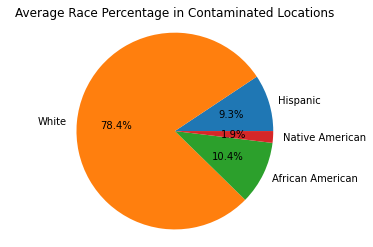

In [76]:
# pie chart for race 
#Contaminated 
Hispanic1 = np.mean(FIPsContaminated["Hispanic"])
White1= np.mean(FIPsContaminated["White"])
Black1=np.mean(FIPsContaminated["Black"])
Native1= np.mean(FIPsContaminated["Native"])

#Clean
Hispanic2 = np.mean(FIPsClean["Hispanic"])
White2 = np.mean(FIPsClean["White"])
Black2 = np.mean(FIPsClean["Black"])
Native2 = np.mean(FIPsClean["Native"])

plt.title("Average Race Percentage in Contaminated Locations")
plt.pie([Hispanic2, White2 , Black2, Native2], labels = ["Hispanic", "White", "African American", "Native American"], autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

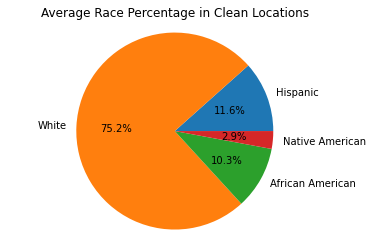

In [75]:
plt.title("Average Race Percentage in Clean Locations")
plt.pie([Hispanic1, White1 , Black1 , Native1], labels = ["Hispanic", "White", "African American", "Native American"], autopct = "%1.1f%%")
plt.axis("equal")
plt.show()